In [2]:
import pandas as pd 

XỬ LÝ THEO ANH KHÁNH ĐÃ THỐNG NHẤT

In [3]:
# Use absolute path to the data file
file_path = "/home/khanhnt/Khiem/MyBachelorThesis/dataset/tbi_encoded.csv"

df = pd.read_csv(file_path)
record_ids = df["record_id"]
record_ids.to_csv("/home/khanhnt/Khiem/MyBachelorThesis/dataset/raw/record_ids.csv",index = False )
df = df.drop(['record_id', 'tbi_ct_brain_parenchyma___9', 'tbi_ct_brain_parenchyma___10', 'tbi_ct_brain_parenchyma___11', 'tbi_ct_brain_parenchyma___12'], axis=1)
df['d_kl_tl'] = df['d_kl_tl'] - 1  # TBI severity class

# Store feature names for later use
feature_names = df.columns.tolist()
print(f"Number of features: {len(feature_names)}")

# Process blood pressure column if it exists
if 'tbi_cli_blood_pressure' in df.columns:
    for i in range(len(df)):
        try:
            bp_value = df.loc[i, 'tbi_cli_blood_pressure']
            
            if bp_value == '2':
                df.loc[i, 'tbi_cli_blood_pressure'] = 2
            elif isinstance(bp_value, str) and bp_value != '0':
                blood_pr1, blood_pr2 = bp_value.split('/')
                blood_pr1, blood_pr2 = int(blood_pr1), int(blood_pr2)
                
                if blood_pr1 < 90 or blood_pr2 < 60:
                    df.loc[i, 'tbi_cli_blood_pressure'] = 0  # Low blood pressure
                elif blood_pr1 >= 140 or blood_pr2 > 90:
                    df.loc[i, 'tbi_cli_blood_pressure'] = 2  # High blood pressure (hypertension)
                elif 90 <= blood_pr1 <= 139 and 60 <= blood_pr2 <= 90:
                    df.loc[i, 'tbi_cli_blood_pressure'] = 1  # Normal blood pressure
                else:
                    df.loc[i, 'tbi_cli_blood_pressure'] = 1
        except:
            pass

# # Create a reproducible 80-20 split with stratification
# X_train_raw, X_test_raw, y_train, y_test = train_test_split(
#     X,                     # Feature matrix
#     y,                     # Target variable (TBI severity)
#     test_size=0.2,         # 20% test size
#     random_state=42,       # Fixed seed for reproducibility
#     stratify=y             # Maintain class proportions
# )
df.to_csv('/home/khanhnt/Khiem/MyBachelorThesis/dataset/raw/dataset.csv', index=False)

Number of features: 65


In [4]:
#in ra những features là object trong df
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Object columns:")
for col in object_columns:
    print(col)
    

Object columns:
tbi_cli_blood_pressure


In [5]:
#kiểm tra xem features nào là np.ndarray 
import numpy as np
# Lấy danh sách các cột có kiểu dữ liệu là np.ndarray
array_columns = df.select_dtypes(include=[np.ndarray]).columns.tolist()
# Hiển thị danh sách các cột
print("Các cột có kiểu dữ liệu là np.ndarray:")
print(array_columns)
#kiểm tra xem features nào là int64
# Lấy danh sách các cột có kiểu dữ liệu là int64
int_columns = df.select_dtypes(include=['int64']).columns.tolist()
# Hiển thị danh sách các cột
print("Các cột có kiểu dữ liệu là int64:")
print(int_columns)
#kiểm tra xem features nào là float64
# Lấy danh sách các cột có kiểu dữ liệu là float64

Các cột có kiểu dữ liệu là np.ndarray:
['tbi_cli_blood_pressure']
Các cột có kiểu dữ liệu là int64:
['tbi_cli_pulse', 'tbi_cli_breathing_rate', 'tbi_cli_glasgow', 'tbi_cli_hypertension', 'tbi_cli_stroke', 'tbi_cli_cardiovascular', 'tbi_ct_brain_parenchyma___1', 'tbi_ct_brain_parenchyma___2', 'tbi_ct_brain_parenchyma___3', 'tbi_ct_brain_parenchyma___4', 'tbi_ct_brain_parenchyma___5', 'tbi_ct_brain_parenchyma___6', 'tbi_ct_brain_parenchyma___8', 'tbi_ct_epidural_hematoma_volume', 'tbi_ct_epidural_hematoma_proportion', 'tbi_ct_epidural_hematoma_value', 'tbi_ct_subdural_hematoma_thick', 'tbi_ct_subdural_hematoma_position_proprotion', 'tbi_ct_subdural_hematoma_position_value', 'tbi_ct_cerebral_contusion_volume', 'tbi_ct_blood_hematoma_proportion', 'tbi_ct_subarachnoid_characteristic', 'tbi_ct_bottom_tank_characteristic', 'tbi_ct_skull_fracture_characteristic', 'tbi_ct_skull_risk', 'd_kl_tl']


Tách ra thành 2 cột a và cột b

In [6]:
# df.head()
# # Drop first column
# print(len(df))
# df.head()
# # Split the 'tbi_cli_blood_pressure' column into two separate columns 'a' and 'b'
# df[['a', 'b']] = df['tbi_cli_blood_pressure'].str.split('/', expand=True)

# # Convert the new columns to appropriate data types
# df['a'] = pd.to_numeric(df['a'], errors='coerce')
# df['b'] = pd.to_numeric(df['b'], errors='coerce')

# # Drop the original 'tbi_cli_blood_pressure' column
# df = df.drop(columns=['tbi_cli_blood_pressure'])

# # Display the first few rows to verify the changes
# df.head()



In [7]:
# # Export the dataframe to a CSV file named tbi1.csv
# df.to_csv('tbi1.csv', index=False)


In [8]:
# from sklearn.model_selection import train_test_split

# # Split the dataframe into train and test sets
# train_df, test_df = train_test_split(
#     df,                    # Complete dataframe
#     test_size=0.2,         # 20% test size
#     random_state=42,       # Fixed seed for reproducibility
#     stratify=df['d_kl_tl'] # Maintain class proportions based on the target column
# )

# # Display the shapes of the resulting datasets
# print("Train DataFrame shape:", train_df.shape)
# print("Test DataFrame shape:", test_df.shape)


In [9]:
# # Export the training set to a CSV file named train.csv in the 'train' folder
# import os
# train_folder = 'train'
# os.makedirs(train_folder, exist_ok=True)
# train_df.to_csv(os.path.join(train_folder, 'train.csv'), index=False)

# # Export the test set to a CSV file named test.csv in the 'test' folder
# test_folder = 'test'
# os.makedirs(test_folder, exist_ok=True)
# test_df.to_csv(os.path.join(test_folder, 'test.csv'), index=False)


In [10]:
import pandas as pd

# Define file paths
record_ids_path = "/home/khanhnt/Khiem/MyBachelorThesis/dataset/raw/record_ids.csv"
filtered_dataset_path = "/home/khanhnt/Khiem/MyBachelorThesis/dataset/raw/filtered_dataset.csv"

# Load datasets
record_ids_df = pd.read_csv(record_ids_path)
filtered_df = pd.read_csv(filtered_dataset_path)

# Convert to sets for efficient lookup
record_ids_set = set(record_ids_df["record_id"])
filtered_ids_set = set(filtered_df["record_id"])

# Find matching and non-matching IDs
matching_count = len(filtered_ids_set.intersection(record_ids_set))
non_matching_ids =  record_ids_set - filtered_ids_set

# Display results
matching_count, non_matching_ids


(499, {124.0, 195.0, 272.0, 274.0, 354.0})

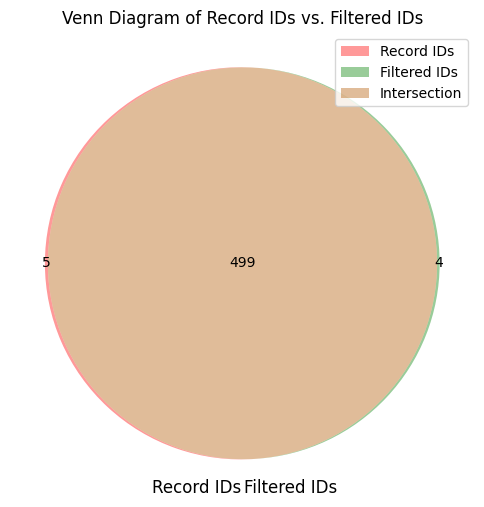

In [11]:
# Draw Venn diagram
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

plt.figure(figsize=(6, 6))
venn = venn2([record_ids_set, filtered_ids_set], ('Record IDs', 'Filtered IDs'))
plt.title("Venn Diagram of Record IDs vs. Filtered IDs")

# Add legend
plt.legend(['Record IDs', 'Filtered IDs', 'Intersection'], loc="upper right")

# Show plot
plt.show()



In [12]:
len(filtered_df)

503

In [13]:
# Lọc các giá trị trong cột 'record_id' thuộc giao của filtered_ids_set và record_ids_set
df = pd.read_csv("/home/khanhnt/Khiem/MyBachelorThesis/dataset/tbi_encoded.csv")
intersection_ids = filtered_ids_set.intersection(record_ids_set)
filtered_records = df[df["record_id"].isin(intersection_ids)]

# Hiển thị kết quả
filtered_records.head()

,record_id,age_at_record,sex,tbi_cli_reason,tbi_cli_time_acci_hos,tbi_cli_pulse,tbi_cli_temp,tbi_cli_blood_pressure,tbi_cli_breathing_rate,tbi_cli_glasgow,...,ast_v2,alt_v2,d_2_protein,albumin_v2,ure_v2,creatinin_v2,prothrombin_v2,d_3_aptt,d_4_dtim,d_kl_tl
0,109.0,52.0,0.0,1.0,2.0,70,36.5,120/70,19,13,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2
1,110.0,75.0,0.0,2.0,NaN,77,36.8,130/77,22,13,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,2
2,112.0,37.0,0.0,3.0,NaN,67,36.6,130/80,18,15,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,2
3,113.0,66.0,0.0,4.0,NaN,75,36.5,120/80,19,14,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3
4,114.0,20.0,0.0,2.0,4.0,85,36.8,120/85,18,15,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,2


In [14]:
len(filtered_records)

499

In [15]:
# Use absolute path to the data file
filtered_records = filtered_records.drop(['record_id', 'tbi_ct_brain_parenchyma___9', 'tbi_ct_brain_parenchyma___10', 'tbi_ct_brain_parenchyma___11', 'tbi_ct_brain_parenchyma___12'], axis=1)
filtered_records['d_kl_tl'] = filtered_records['d_kl_tl'] - 1  # TBI severity class

# Store feature names for later use
feature_names = filtered_records.columns.tolist()
print(f"Number of features: {len(feature_names)}")

# Process blood pressure column if it exists
if 'tbi_cli_blood_pressure' in filtered_records.columns:
    for i in range(len(filtered_records)):
        try:
            bp_value = filtered_records.loc[i, 'tbi_cli_blood_pressure']
            
            if bp_value == '2':
                filtered_records.loc[i, 'tbi_cli_blood_pressure'] = 2
            elif isinstance(bp_value, str) and bp_value != '0':
                blood_pr1, blood_pr2 = bp_value.split('/')
                blood_pr1, blood_pr2 = int(blood_pr1), int(blood_pr2)
                
                if blood_pr1 < 90 or blood_pr2 < 60:
                    filtered_records.loc[i, 'tbi_cli_blood_pressure'] = 0  # Low blood pressure
                elif blood_pr1 >= 140 or blood_pr2 > 90:
                    filtered_records.loc[i, 'tbi_cli_blood_pressure'] = 2  # High blood pressure (hypertension)
                elif 90 <= blood_pr1 <= 139 and 60 <= blood_pr2 <= 90:
                    filtered_records.loc[i, 'tbi_cli_blood_pressure'] = 1  # Normal blood pressure
                else:
                    filtered_records.loc[i, 'tbi_cli_blood_pressure'] = 1
        except:
            pass

# # Create a reproducible 80-20 split with stratification
# X_train_raw, X_test_raw, y_train, y_test = train_test_split(
#     X,                     # Feature matrix
#     y,                     # Target variable (TBI severity)
#     test_size=0.2,         # 20% test size
#     random_state=42,       # Fixed seed for reproducibility
#     stratify=y             # Maintain class proportions
# )

Number of features: 65


In [16]:
for col in filtered_records.columns:
    filtered_records[col] = pd.to_numeric(filtered_records[col], errors='coerce')
filtered_records.to_csv('/home/khanhnt/Khiem/MyBachelorThesis/dataset/raw/modality1_499_records.csv', index=False)

In [17]:
len(filtered_records)
len(df)

504

In [18]:
# Lấy danh sách các cột có kiểu dữ liệu là object
object_columns = filtered_records.select_dtypes(include=['object']).columns.tolist()

# Hiển thị danh sách các cột
print("Các cột có kiểu dữ liệu là object:")
print(object_columns)
#chuyển đổi kiểu dữ liệu của các cột này thành float
# Kiểm tra lại kiểu dữ liệu của các cột


Các cột có kiểu dữ liệu là object:
[]


In [19]:
filtered_records[object_columns].head()

""
0
1
2
3
4


In [20]:
# Lấy danh sách các cột có kiểu dữ liệu là object
object_columns = filtered_records.select_dtypes(include=['object']).columns.tolist()

# Hiển thị danh sách các cột
print("Các cột có kiểu dữ liệu là object:")
print(object_columns)

Các cột có kiểu dữ liệu là object:
[]


In [21]:
#kiểm tra xem features nào là np.ndarray 
import numpy as np
# Lấy danh sách các cột có kiểu dữ liệu là np.ndarray
array_columns = filtered_records.select_dtypes(include=[np.ndarray]).columns.tolist()
# Hiển thị danh sách các cột
print("Các cột có kiểu dữ liệu là np.ndarray:")
print(array_columns)
#kiểm tra xem features nào là int64
# Lấy danh sách các cột có kiểu dữ liệu là int64
int_columns = filtered_records.select_dtypes(include=['int64']).columns.tolist()
# Hiển thị danh sách các cột
print("Các cột có kiểu dữ liệu là int64:")
print(int_columns)
#kiểm tra xem features nào là float64
# Lấy danh sách các cột có kiểu dữ liệu là float64

Các cột có kiểu dữ liệu là np.ndarray:
[]
Các cột có kiểu dữ liệu là int64:
['tbi_cli_pulse', 'tbi_cli_breathing_rate', 'tbi_cli_glasgow', 'tbi_cli_hypertension', 'tbi_cli_stroke', 'tbi_cli_cardiovascular', 'tbi_ct_brain_parenchyma___1', 'tbi_ct_brain_parenchyma___2', 'tbi_ct_brain_parenchyma___3', 'tbi_ct_brain_parenchyma___4', 'tbi_ct_brain_parenchyma___5', 'tbi_ct_brain_parenchyma___6', 'tbi_ct_brain_parenchyma___8', 'tbi_ct_epidural_hematoma_volume', 'tbi_ct_epidural_hematoma_proportion', 'tbi_ct_epidural_hematoma_value', 'tbi_ct_subdural_hematoma_thick', 'tbi_ct_subdural_hematoma_position_proprotion', 'tbi_ct_subdural_hematoma_position_value', 'tbi_ct_cerebral_contusion_volume', 'tbi_ct_blood_hematoma_proportion', 'tbi_ct_subarachnoid_characteristic', 'tbi_ct_bottom_tank_characteristic', 'tbi_ct_skull_fracture_characteristic', 'tbi_ct_skull_risk', 'd_kl_tl']


In [22]:
data1 = pd.read_csv("/home/khanhnt/Khiem/MyBachelorThesis/dataset/raw/dataset.csv")
data2 = pd.read_csv("/home/khanhnt/Khiem/MyBachelorThesis/dataset/raw/modality1_499_records.csv")
print("dataset1: ")
print(data1.describe())
print("dataset2: ")
print(data2.describe())


dataset1: 
       age_at_record         sex  tbi_cli_reason  tbi_cli_time_acci_hos  \
count     503.000000  503.000000      503.000000             466.000000   
mean       43.856859    0.242545        1.687873              40.759657   
std        21.243405    0.429049        1.400054             297.332322   
min         6.000000    0.000000        1.000000               1.000000   
25%        24.000000    0.000000        1.000000               3.000000   
50%        43.000000    0.000000        1.000000               4.000000   
75%        62.000000    0.000000        2.000000               6.000000   
max        93.000000    1.000000        7.000000            5760.000000   

       tbi_cli_pulse  tbi_cli_temp  tbi_cli_blood_pressure  \
count     504.000000    504.000000              503.000000   
mean       78.311508     36.668849                1.101392   
std        11.179548      0.282283                0.308670   
min        15.000000     36.000000                0.000000   
25%

In [23]:
# import torch
# from torch.utils.data import Dataset
# import pandas as pd
# import numpy as np
# from typing import Dict, Optional

# class TBIDataset(Dataset):
#     def __init__(
#         self,
#         data: pd.DataFrame,
#         config: Dict,
#         transform: Optional[callable] = None
#     ):
#         self.data = data
#         self.config = config
#         self.transform = transform
        
#         # Separate features and target
#         self.features = self.data.drop(columns=[config['target_column']])
#         self.targets = self.data[config['target_column']]
        
#         # # Get feature indices
#         # self.num_indices = [self.features.columns.get_loc(col) 
#         #                    for col in config['features']['numerical']]
#         # self.cat_indices = [self.features.columns.get_loc(col) 
#         #                    for col in config['features']['categorical']]
        
#     def __len__(self):
#         return len(self.data)
        
#     def __getitem__(self, idx):
#         x = self.features.iloc[idx].values
#         y = self.targets.iloc[idx]
        
#         # Convert to tensor
#         print(type(x))
#         x = torch.FloatTensor(x)
#         y = torch.LongTensor([y])[0]
        
#         if self.transform:
#             x = self.transform(x)
            
#         return x, y 
    
# def main():
#     data = pd.read_csv("/home/khanhnt/Khiem/MyBachelorThesis/dataset/raw/modality1_499_records.csv")
#     config = {
#         'target_column': 'd_kl_tl'
#     }
#     dataset = TBIDataset(data, config)
#     print(dataset[0])

# if __name__ == '__main__':
#     main()

In [24]:
data = pd.read_csv("/home/khanhnt/Khiem/MyBachelorThesis/dataset/raw/modality1_499_records.csv")
features = data.drop(columns=['d_kl_tl'])
targets = data['d_kl_tl']
x = features.iloc[0].values
y = targets.iloc[0]
print(x)
print(y)

[ 52.    0.    1.    2.   70.   36.5   1.   19.   13.    1.    1.    1.
   2.    2.    2.    2.    2.    1.    2.5   1.    2.5   1.    2.    2.
   2.    2.    0.    1.    1.    0.    1.    0.    1.    0.    0.    0.
   0.    7.    1.   70.    0.    0.    0.    0.    0.    2.    1.    0.
   2.    2.    1.    1.    1.    1.  237.9   1.    1.    0.    1.    0.
   0.    0.    0.    1. ]
1


In [25]:
# Lọc các giá trị trong cột 'record_id' thuộc giao của filtered_ids_set và record_ids_set
df = pd.read_csv("/home/khanhnt/Khiem/MyBachelorThesis/dataset/raw/filtered_dataset.csv")
intersection_ids = filtered_ids_set.intersection(record_ids_set)
modality_2 = df[df["record_id"].isin(intersection_ids)]

# Hiển thị kết quả
modality_2.head()

,record_id,redcap_event_name,redcap_repeat_instrument,redcap_repeat_instance,time_start_survey_pt,hong_cau_v2,bach_cau_v2,tieu_cau_v2,d_1_hst,ethanol,...,d_kl_cd_2,d_kl_tl,d_kl_xu_tri,d_kl_xu_tri_2,ppm,d_kl_cd_3,d_status,status_demographics_4,status_describe_unclear_4,paraclinical_tests_complete
1,109,thu_benh_an_arm_1,paraclinical_tests,1,12/4/2023 22:05,3.56,3.3,135.0,122.0,237.9,...,"CTSN: MTDMC trán-TD T, XHDN TD T, gãy thành tr...",2.0,NaN,Chụp lại CLVT sọ não sau 4h. Theo dõi sát các...,NaN,Chấn thương sọ não: máu tụ dưới màng cứng trán...,NaN,1.0,NaN,2.0
2,110,thu_benh_an_arm_1,paraclinical_tests,1,12/4/2023 22:15,3.46,7.9,217.0,110.0,0.0,...,Máu tụ DMC mạn tính 2 bán cầu,2.0,NaN,Máu tụ dưới màng cứng mạn tính 2 bán cầu.,"Bơm rửa máu tụ, dẫn lưu kín ổ máu tụ",Máu tụ dưới màng cứng mạn tính 2 bán cầu.,NaN,1.0,NaN,2.0
3,112,thu_benh_an_arm_1,paraclinical_tests,1,12/4/2023 22:29,4.14,4.2,255.0,128.0,NaN,...,"Chấn thương sọ não: DNXH thái dương P, XHDN lề...",2.0,NaN,"Theo dõi ý thức, mạch, nhiệt độ, huyết áp Chụ...",NaN,Chấn thương sọ não: dập não xuất huyết thái dư...,NaN,1.0,NaN,2.0
4,113,thu_benh_an_arm_1,paraclinical_tests,1,12/4/2023 22:43,3.52,14.2,92.0,114.0,NaN,...,CTSN:máu tụ dưới màng cứng trán thái dương phả...,3.0,NaN,"Theo dõi sát ý thức, mạch, nhiệt độ, huyết áp ...",NaN,"Chấn thương sọ não: dập não xuất huyết, máu tụ...",NaN,1.0,NaN,2.0
5,114,thu_benh_an_arm_1,paraclinical_tests,1,12/4/2023 23:04,4.94,17.2,221.0,149.0,0.0,...,"CTSN: toác khớp liên đỉnh + đỉnh chẩm 2 bên, x...",2.0,NaN,"Theo dõi ý thức, mạch, nhiệt độ, huyết áp Chụ...",NaN,"Chấn thương sọ não: toác khớp liên đỉnh, sưng ...",NaN,1.0,NaN,2.0
